In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [3]:
TRAIN_PATH = "train_df.csv"
TEST_PATH  = "Test_SJC.csv"

In [4]:
df=pd.read_csv("train_SJC.csv")

In [5]:
df.head()

,Unnamed: 0,Unnamed: 1,DateReported,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,DependentsOther,Unnamed: 8,Unnamed: 9,Unnamed: 10,DaysWorkedPerWeek,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,ClaimNumber,DateTimeOfAccident,NaN,Age,Gender,MaritalStatus,DependentChildren,NaN,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,NaN,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717


In [6]:
##Rename columns (stable mapping)
rename_map = {
    "Unnamed: 0": "ClaimNumber",
    "Unnamed: 1": "DateTimeOfAccident",
    "Unnamed: 3": "Age",
    "Unnamed: 4": "Gender",
    "Unnamed: 5": "MaritalStatus",
    "Unnamed: 6": "DependentChildren",
    "Unnamed: 8": "WeeklyWages",
    "Unnamed: 9": "PartTimeFullTime",
    "Unnamed: 10": "HoursWorkedPerWeek",
    "Unnamed: 12": "ClaimDescription",
    "Unnamed: 13": "InitialIncurredCalimsCost",
    "Unnamed: 14": "UltimateIncurredClaimCost"
}
df = df.rename(columns=rename_map, inplace=False)


In [7]:
df=df.drop(df.index[0])
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
1,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0.0,500,F,38,5.0,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
2,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0.0,509.34,F,37.5,5.0,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
3,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0.0,709.1,F,38,5.0,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
4,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0.0,555.46,F,38,5.0,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.48717
5,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0.0,377.1,F,38,5.0,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


## Pre-processing

In [8]:
df.describe() # displays only for numeric columns

,DependentsOther,DaysWorkedPerWeek
count,36176.000000,36176.000000
mean,0.009537,4.905794
std,0.106163,0.547077
min,0.000000,1.000000
25%,0.000000,5.000000
50%,0.000000,5.000000
75%,0.000000,5.000000
max,3.000000,7.000000


In [9]:
df.shape

(36176, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36176 entries, 1 to 36176
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ClaimNumber                36176 non-null  object 
 1   DateTimeOfAccident         36176 non-null  object 
 2   DateReported               36176 non-null  object 
 3   Age                        36176 non-null  object 
 4   Gender                     36176 non-null  object 
 5   MaritalStatus              36154 non-null  object 
 6   DependentChildren          36176 non-null  object 
 7   DependentsOther            36176 non-null  float64
 8   WeeklyWages                36120 non-null  object 
 9   PartTimeFullTime           36176 non-null  object 
 10  HoursWorkedPerWeek         36127 non-null  object 
 11  DaysWorkedPerWeek          36176 non-null  float64
 12  ClaimDescription           36176 non-null  object 
 13  InitialIncurredCalimsCost  36176 non-null  obj

In [11]:
# few numeric datatypes are classified as string
df.dtypes 

ClaimNumber                   object
DateTimeOfAccident            object
DateReported                  object
Age                           object
Gender                        object
MaritalStatus                 object
DependentChildren             object
DependentsOther              float64
WeeklyWages                   object
PartTimeFullTime              object
HoursWorkedPerWeek            object
DaysWorkedPerWeek            float64
ClaimDescription              object
InitialIncurredCalimsCost     object
UltimateIncurredClaimCost     object
dtype: object

In [12]:
num_to_numeric = ["Age","DependentChildren","WeeklyWages","HoursWorkedPerWeek",
                  "InitialIncurredCalimsCost","UltimateIncurredClaimCost"]
for c in num_to_numeric:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
df[num_to_numeric].describe()


,Age,DependentChildren,WeeklyWages,HoursWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost
count,36176.000000,36176.000000,36120.000000,36127.000000,36176.000000,3.617600e+04
mean,33.795196,0.121296,416.471426,37.766820,7743.593874,1.095282e+04
std,12.114729,0.525395,243.875364,12.494323,18223.698531,3.529614e+04
min,13.000000,0.000000,1.000000,0.000000,1.000000,1.218868e+02
25%,23.000000,0.000000,200.000000,38.000000,700.000000,9.257424e+02
50%,32.000000,0.000000,393.365000,38.000000,2000.000000,3.373862e+03
75%,43.000000,0.000000,500.000000,40.000000,9500.000000,8.186852e+03
max,79.000000,9.000000,7497.000000,640.000000,830000.000000,4.027136e+06


In [13]:
df.dtypes

ClaimNumber                   object
DateTimeOfAccident            object
DateReported                  object
Age                            int64
Gender                        object
MaritalStatus                 object
DependentChildren              int64
DependentsOther              float64
WeeklyWages                  float64
PartTimeFullTime              object
HoursWorkedPerWeek           float64
DaysWorkedPerWeek            float64
ClaimDescription              object
InitialIncurredCalimsCost      int64
UltimateIncurredClaimCost    float64
dtype: object

In [14]:
if "DateTimeOfAccident" in df.columns:
    df["DateTimeOfAccident"] = pd.to_datetime(df["DateTimeOfAccident"], errors="coerce")
    df["YearOfAccident"] = df["DateTimeOfAccident"].dt.year
df[["DateTimeOfAccident","YearOfAccident"]].head()


,DateTimeOfAccident,YearOfAccident
1,2002-04-09 07:00:00+00:00,2002
2,1999-01-07 11:00:00+00:00,1999
3,1996-03-25 00:00:00+00:00,1996
4,2005-06-22 13:00:00+00:00,2005
5,1990-08-29 08:00:00+00:00,1990


## Missing value analysis and treatment

In [15]:
df.isnull().sum()

ClaimNumber                   0
DateTimeOfAccident            0
DateReported                  0
Age                           0
Gender                        0
MaritalStatus                22
DependentChildren             0
DependentsOther               0
WeeklyWages                  56
PartTimeFullTime              0
HoursWorkedPerWeek           49
DaysWorkedPerWeek             0
ClaimDescription              0
InitialIncurredCalimsCost     0
UltimateIncurredClaimCost     0
YearOfAccident                0
dtype: int64

In [16]:
df['MaritalStatus'].value_counts() # categorical

MaritalStatus
S    17450
M    15162
U     3542
Name: count, dtype: int64

In [17]:
df['WeeklyWages'].value_counts() # continuous

WeeklyWages
200.00     8220
500.00     2823
300.00      374
400.00      264
350.00      239
           ... 
259.72        1
281.26        1
425.06        1
237.19        1
1668.83       1
Name: count, Length: 10468, dtype: int64

In [18]:
df['HoursWorkedPerWeek'].value_counts() # continuous

HoursWorkedPerWeek
38.00     20652
40.00      8903
20.00       571
30.00       562
35.00       500
          ...  
27.46         1
56.10         1
33.20         1
638.00        1
58.02         1
Name: count, Length: 355, dtype: int64

In [19]:
if "MaritalStatus" in df.columns:
    df["MaritalStatus"] = df["MaritalStatus"].fillna("U")


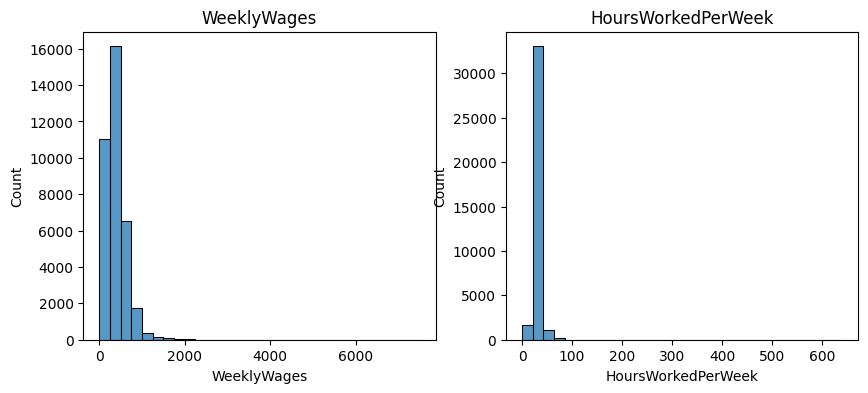

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(df["WeeklyWages"], ax=axes[0], bins=30)
axes[0].set_title("WeeklyWages")
sns.histplot(df["HoursWorkedPerWeek"], ax=axes[1], bins=30)
axes[1].set_title("HoursWorkedPerWeek")
plt.show()


In [21]:
if "Age" in df.columns:
    df["Age_Bin"] = pd.cut(df["Age"], bins=[12,35,57,80], labels=["Youth","Adult","Senior_Citizen"])
df["Age_Bin"].value_counts(dropna=False)[:10]


Age_Bin
Youth             21512
Adult             13260
Senior_Citizen     1404
Name: count, dtype: int64

In [22]:

# We bin UltimateIncurredClaimCost into 5 quantiles => 'SeverityClass' {0..4}
target_cont = "UltimateIncurredClaimCost"
assert target_cont in df.columns, f"{target_cont} missing!"

# qcut robust: drop rows with NaN target, handle duplicates
df_cls = df.copy()
df_cls = df_cls[pd.notnull(df_cls[target_cont])]
try:
    df_cls["SeverityClass"] = pd.qcut(df_cls[target_cont].astype(float), q=5, labels=[0,1,2,3,4])
except ValueError:
    # If many duplicate values, reduce bins
    df_cls["SeverityClass"] = pd.qcut(df_cls[target_cont].astype(float), q=4, labels=[0,1,2,3])

df_cls["SeverityClass"] = df_cls["SeverityClass"].astype(int)
df_cls["SeverityClass"].value_counts().sort_index()


SeverityClass
0    7236
1    7235
2    7235
3    7235
4    7235
Name: count, dtype: int64

In [23]:
drop_cols = {"UltimateIncurredClaimCost", "ClaimNumber"}  # ClaimNumber is an ID-like field
feature_candidates = [c for c in df_cls.columns if c not in drop_cols and c != "SeverityClass"]
feature_candidates[:15], len(feature_candidates)


(['DateTimeOfAccident',
  'DateReported',
  'Age',
  'Gender',
  'MaritalStatus',
  'DependentChildren',
  'DependentsOther',
  'WeeklyWages',
  'PartTimeFullTime',
  'HoursWorkedPerWeek',
  'DaysWorkedPerWeek',
  'ClaimDescription',
  'InitialIncurredCalimsCost',
  'YearOfAccident',
  'Age_Bin'],
 15)

In [24]:
X = df_cls[feature_candidates].copy()
y = df_cls["SeverityClass"].copy()
X.shape, y.shape, y.value_counts().sort_index()


((36176, 15),
 (36176,),
 SeverityClass
 0    7236
 1    7235
 2    7235
 3    7235
 4    7235
 Name: count, dtype: int64)

In [25]:
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
# Include engineered bins + PartTimeFullTime etc. if they are object
for maybe_cat in ["Age_Bin","Gender","MaritalStatus","PartTimeFullTime","ClaimDescription"]:
    if maybe_cat in X.columns and maybe_cat not in cat_cols:
        if X[maybe_cat].dtype == "O" or str(X[maybe_cat].dtype).startswith("category"):
            cat_cols.append(maybe_cat)

num_cols = [c for c in X.columns if c not in cat_cols and c != "DateTimeOfAccident"]
num_cols


['Age',
 'DependentChildren',
 'DependentsOther',
 'WeeklyWages',
 'HoursWorkedPerWeek',
 'DaysWorkedPerWeek',
 'InitialIncurredCalimsCost',
 'YearOfAccident']

In [26]:
if "DateTimeOfAccident" in X.columns:
    X["AccidentYear"] = pd.to_datetime(X["DateTimeOfAccident"], errors="coerce").dt.year
    X = X.drop(columns=["DateTimeOfAccident"])
    if "AccidentYear" not in num_cols:
        num_cols.append("AccidentYear")

X.shape


(36176, 15)

## Train/Val/Test split

In [27]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=RANDOM_STATE, stratify=y_temp
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)


Train: (25323, 15) Val: (5426, 15) Test: (5427, 15)


## Preprocess pipeline (impute + encode + scale)

In [29]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=False))  # sparse safety if needed
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))

])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop",
    sparse_threshold=0.1
)


In [30]:
def fit_predict_report(clf, name, Xtr, ytr, Xva, yva):
    pipe = Pipeline(steps=[("prep", preprocess), ("model", clf)])
    pipe.fit(Xtr, ytr)
    yhat = pipe.predict(Xva)
    acc = accuracy_score(yva, yhat)
    f1 = f1_score(yva, yhat, average="weighted")
    print(f"[{name}] Val Accuracy: {acc:.4f} | F1 (weighted): {f1:.4f}")
    return pipe, yhat


## Logistic Regression

In [33]:
log_reg = LogisticRegression(
    solver="lbfgs",
    max_iter=3000,
    class_weight="balanced",
    random_state=RANDOM_STATE
)

log_pipe, y_val_pred_lr = fit_predict_report(
    log_reg, "LogisticRegression", X_train, y_train, X_val, y_val
)


[LogisticRegression] Val Accuracy: 0.6167 | F1 (weighted): 0.6179


/Users/saitejaboda/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 3000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0     0.6678    0.7465    0.7050      1085
           1     0.5169    0.5212    0.5190      1086
           2     0.5014    0.5115    0.5064      1085
           3     0.5929    0.5853    0.5891      1085
           4     0.8298    0.7189    0.7704      1085

    accuracy                         0.6167      5426
   macro avg     0.6217    0.6167    0.6180      5426
weighted avg     0.6217    0.6167    0.6179      5426



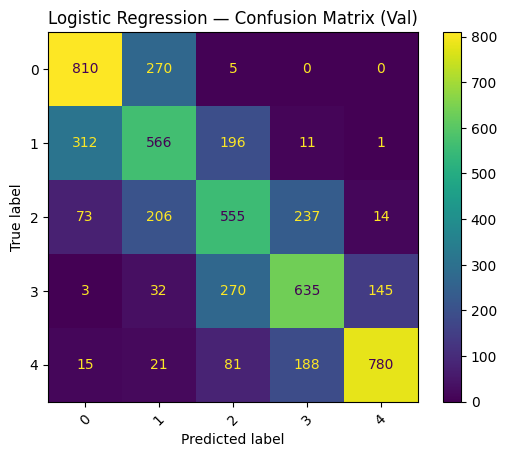

In [34]:
print(classification_report(y_val, y_val_pred_lr, digits=4))
cm = confusion_matrix(y_val, y_val_pred_lr)
ConfusionMatrixDisplay(cm).plot(xticks_rotation=45)
plt.title("Logistic Regression — Confusion Matrix (Val)")
plt.show()


## Random Forest

In [35]:
rf = RandomForestClassifier(
    n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=1,
    random_state=RANDOM_STATE, n_jobs=-1, class_weight="balanced_subsample"
)
rf_pipe, y_val_pred_rf = fit_predict_report(rf, "RandomForest", X_train, y_train, X_val, y_val)


[RandomForest] Val Accuracy: 0.6257 | F1 (weighted): 0.6235


              precision    recall  f1-score   support

           0     0.6578    0.7742    0.7113      1085
           1     0.5071    0.5267    0.5167      1086
           2     0.5167    0.4129    0.4590      1085
           3     0.6024    0.6829    0.6402      1085
           4     0.8593    0.7318    0.7904      1085

    accuracy                         0.6257      5426
   macro avg     0.6287    0.6257    0.6235      5426
weighted avg     0.6286    0.6257    0.6235      5426



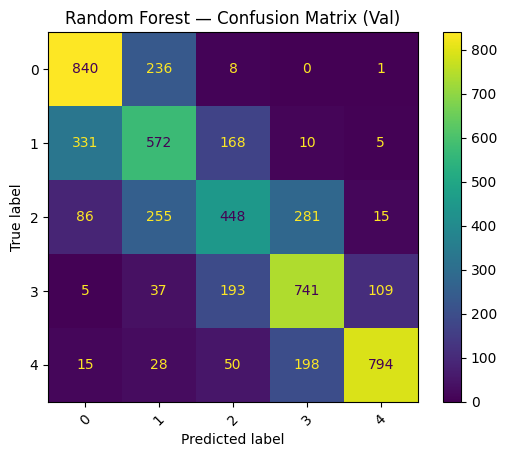

In [36]:
print(classification_report(y_val, y_val_pred_rf, digits=4))
cm = confusion_matrix(y_val, y_val_pred_rf)
ConfusionMatrixDisplay(cm).plot(xticks_rotation=45)
plt.title("Random Forest — Confusion Matrix (Val)")
plt.show()


## Gradient Boosting

In [37]:
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_pipe, y_val_pred_gb = fit_predict_report(gb, "GradientBoosting", X_train, y_train, X_val, y_val)


[GradientBoosting] Val Accuracy: 0.6449 | F1 (weighted): 0.6450


              precision    recall  f1-score   support

           0     0.6685    0.7696    0.7155      1085
           1     0.5172    0.5525    0.5343      1086
           2     0.5583    0.4544    0.5010      1085
           3     0.6158    0.7401    0.6722      1085
           4     0.9253    0.7078    0.8021      1085

    accuracy                         0.6449      5426
   macro avg     0.6570    0.6449    0.6450      5426
weighted avg     0.6570    0.6449    0.6450      5426



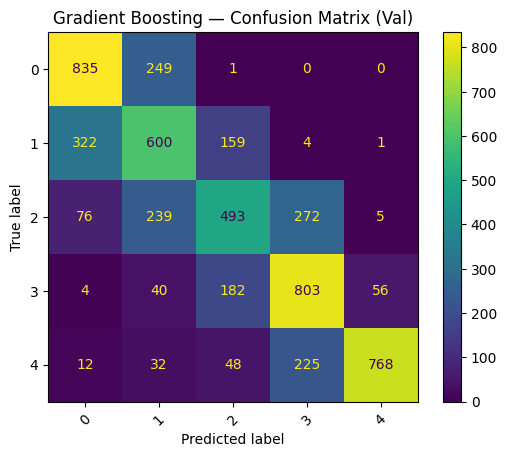

In [38]:
print(classification_report(y_val, y_val_pred_gb, digits=4))
cm = confusion_matrix(y_val, y_val_pred_gb)
ConfusionMatrixDisplay(cm).plot(xticks_rotation=45)
plt.title("Gradient Boosting — Confusion Matrix (Val)")
plt.show()


## SVC

In [39]:
svc = SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=RANDOM_STATE)
svc_pipe, y_val_pred_svc = fit_predict_report(svc, "SVC (RBF)", X_train, y_train, X_val, y_val)


[SVC (RBF)] Val Accuracy: 0.2000 | F1 (weighted): 0.0666


              precision    recall  f1-score   support

           0     0.2000    1.0000    0.3333      1085
           1     0.0000    0.0000    0.0000      1086
           2     0.0000    0.0000    0.0000      1085
           3     0.0000    0.0000    0.0000      1085
           4     0.0000    0.0000    0.0000      1085

    accuracy                         0.2000      5426
   macro avg     0.0400    0.2000    0.0667      5426
weighted avg     0.0400    0.2000    0.0666      5426



/Users/saitejaboda/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/saitejaboda/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/saitejaboda/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

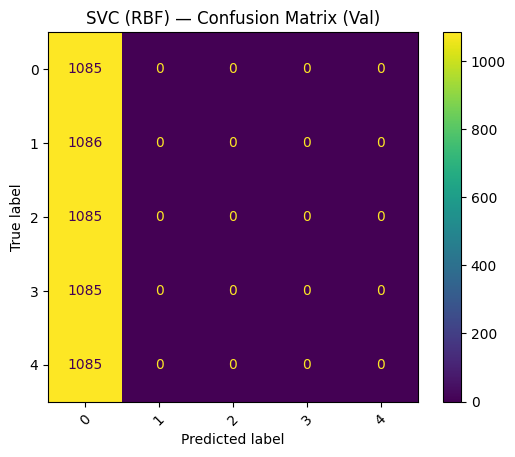

In [40]:
print(classification_report(y_val, y_val_pred_svc, digits=4))
cm = confusion_matrix(y_val, y_val_pred_svc)
ConfusionMatrixDisplay(cm).plot(xticks_rotation=45)
plt.title("SVC (RBF) — Confusion Matrix (Val)")
plt.show()
